<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Práctico:-Recomendación-de-Artistas" data-toc-modified-id="Práctico:-Recomendación-de-Artistas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Práctico: Recomendación de Artistas</a></span><ul class="toc-item"><li><span><a href="#Actividades" data-toc-modified-id="Actividades-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Actividades</a></span></li><li><span><a href="#Ejercicio-1---Análisis-Exploratorio-de-Datos" data-toc-modified-id="Ejercicio-1---Análisis-Exploratorio-de-Datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejercicio 1 - Análisis Exploratorio de Datos</a></span></li><li><span><a href="#Ejercicio-2---Sistema-de-Recomendación" data-toc-modified-id="Ejercicio-2---Sistema-de-Recomendación-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejercicio 2 - Sistema de Recomendación</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-2a---Filtrados-Colaborativos" data-toc-modified-id="Ejercicio-2a---Filtrados-Colaborativos-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ejercicio 2a - Filtrados Colaborativos</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-Usuario-Contenido" data-toc-modified-id="Matriz-de-Usuario-Contenido-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Matriz de Usuario-Contenido</a></span></li><li><span><a href="#Entrenamiento-del-algoritmo-de-recomendación" data-toc-modified-id="Entrenamiento-del-algoritmo-de-recomendación-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Entrenamiento del algoritmo de recomendación</a></span></li><li><span><a href="#Sistema-de-recomendación:" data-toc-modified-id="Sistema-de-recomendación:-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Sistema de recomendación:</a></span></li></ul></li><li><span><a href="#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados" data-toc-modified-id="Ejercicio-2b---Sistemas-de-Recomendación-Avanzados-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Ejercicio 2b - Sistemas de Recomendación Avanzados</a></span><ul class="toc-item"><li><span><a href="#Evaluacion-sobre-cold-start" data-toc-modified-id="Evaluacion-sobre-cold-start-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Evaluacion sobre cold start</a></span></li><li><span><a href="#EVectores-de-contenido" data-toc-modified-id="EVectores-de-contenido-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>EVectores de contenido</a></span></li><li><span><a href="#Sistema-de-Recomendacion" data-toc-modified-id="Sistema-de-Recomendacion-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Sistema de Recomendacion</a></span></li><li><span><a href="#Evaluacion-del-Sistema" data-toc-modified-id="Evaluacion-del-Sistema-1.3.2.4"><span class="toc-item-num">1.3.2.4&nbsp;&nbsp;</span>Evaluacion del Sistema</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [53]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from scipy.sparse import csr_matrix
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

import os 

In [3]:
os.getcwd()

'C:\\Users\\CristianSalgado\\OneDrive - Pi Data Strategy & Consulting\\Desafio Pi\\Sistema_Recomendacion_Git\\gr6_rec-sys\\practico'

In [4]:
artists = pd.read_csv('data/lastfm/artists.dat', sep="\t")


In [5]:
user_artist = pd.read_csv('data/lastfm/user_artists.dat', sep="\t", encoding = 'unicode_escape', engine ='python')
tags = pd.read_csv('data/lastfm/tags.dat', sep="\t", encoding = 'unicode_escape', engine ='python')
user_friends = pd.read_csv('data/lastfm/user_friends.dat', sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists = pd.read_csv('data/lastfm/user_taggedartists.dat', sep="\t", encoding = 'unicode_escape', engine ='python')
user_taggedartists_timestamps = pd.read_csv('data/lastfm/user_taggedartists_timestamps.dat', sep="\t")

In [6]:
#artist_data = pd.read_csv("../data/lastfmt/artists.dat", sep="\t")
artist_data = artists
artist_data.head()
#len(artist_data)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [7]:
#user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays = user_artist

user_artist_plays.head()
#len(user_artist_plays)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [8]:
tags.sample(5)

,tagID,tagValue
127,128,hit
8567,8995,exquisite
3821,3893,muito boa
11836,12522,englisch
11563,12223,goldfrapp


In [9]:
user_taggedartists.sample(5)
#len(user_taggedartists)

,userID,artistID,tagID,day,month,year
71336,743,195,134,1,3,2009
144797,1670,15974,1358,1,2,2010
114460,1277,2983,73,1,12,2007
183420,2033,1379,16,1,10,2010
169485,1914,3065,195,1,11,2009


In [10]:
user_friends.sample(5)

,userID,friendID
7013,498,1132
2277,162,691
1563,129,57
2779,210,1002
878,63,1978


In [11]:
user_taggedartists_timestamps

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
...,...,...,...,...
186474,2100,16437,4,1277935200000
186475,2100,16437,292,1272664800000
186476,2100,16437,2087,1277935200000
186477,2100,16437,2801,1272664800000


## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [12]:
user_artist_plays.head(1)

,userID,artistID,weight
0,2,51,13883


In [13]:
#df1 = artist_data.merge(user_artist_plays, left_on='id', right_on='userID' , how='inner')
#df1 =user_artist_plays.merge(artist_data, left_on='userID', right_on='id' , how='left')
df = pd.merge(
  artist_data, user_artist_plays,
  how="inner",
  left_on="id",
  right_on="artistID"
)
df = df.rename(columns={"weight": "playCount"})

In [14]:
#Get total observations
print(f"There are {df.shape[0]} observations in the dataset")


There are 92834 observations in the dataset


In [15]:
df.isnull().sum()  #nulos


id              0
name            0
url             0
pictureURL    445
userID          0
artistID        0
playCount       0
dtype: int64

In [16]:
df.dtypes #types


id             int64
name          object
url           object
pictureURL    object
userID         int64
artistID       int64
playCount      int64
dtype: object

In [17]:
print('Dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::10000, :])

Dataset shape: (92834, 7)
-Dataset examples-
          id                 name  \
0          1         MALICE MIZER   
10000    227          The Beatles   
20000    349   The Pussycat Dolls   
30000    562              The Who   
40000    959                Queen   
50000   1456    Far East Movement   
60000   2584           Rogue Wave   
70000   4463  Fernando & Sorocaba   
80000   8369   Faith and the Muse   
90000  15715           Agnes Obel   

                                                     url  \
0                  http://www.last.fm/music/MALICE+MIZER   
10000               http://www.last.fm/music/The+Beatles   
20000        http://www.last.fm/music/The+Pussycat+Dolls   
30000                   http://www.last.fm/music/The+Who   
40000                     http://www.last.fm/music/Queen   
50000         http://www.last.fm/music/Far+East+Movement   
60000                http://www.last.fm/music/Rogue+Wave   
70000  http://www.last.fm/music/Fernando%2B%2526%2BSo...   
80000  

In [18]:
n_ratings = len(df)
n_artist = df['artistID'].nunique()
n_users = df['userID'].nunique()

print(f"Numero de Listens: {n_ratings}")
print(f"Numero de Artistas únicos : {n_artist}")
print(f"Numero de Usuarios únicos : {n_users}")
print(f"Promedio de Listens por usuario : {round(n_ratings/n_users, 2)}")
print(f"Promedio de Listens por Artistas : {round(n_ratings/n_artist, 2)}")

Numero de Listens: 92834
Numero de Artistas únicos : 17632
Numero de Usuarios únicos : 1892
Promedio de Listens por usuario : 49.07
Promedio de Listens por Artistas : 5.27


In [19]:
### Artist Rank

In [20]:
artist_rank = df.groupby(['name']) \
  .agg({'userID' : 'count', 'playCount' : 'sum'}) \
  .rename(columns={"userID" : 'totalUniqueUsers', "playCount" : "totalArtistPlays"}) \
  .sort_values(['totalArtistPlays'], ascending=False)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [21]:
df = df.join(artist_rank, on="name", how="inner") \
  .sort_values(['playCount'], ascending=False)

In [22]:
df.head(5)

,id,name,url,pictureURL,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,http://www.last.fm/music/Thal%C3%ADa,http://userserve-ak.last.fm/serve/252/40337541...,2071,792,324663,26,350035,13462.884615
27302,511,U2,http://www.last.fm/music/U2,http://userserve-ak.last.fm/serve/252/4404698.jpg,1094,511,320725,185,493024,2664.994595
8152,203,Blur,http://www.last.fm/music/Blur,http://userserve-ak.last.fm/serve/252/269394.jpg,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...,1664,498,227829,399,963449,2414.659148


In [23]:
df = df.drop(columns=['url', 'pictureURL','id',])
df.head()

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148


In [24]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12) 

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right')

    plt.xticks(rotation=90)
    plt.show()

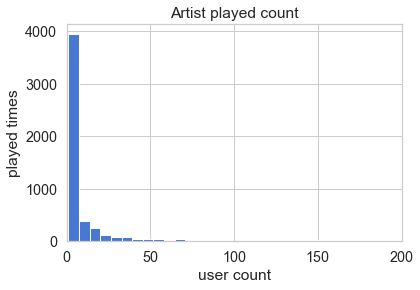

In [25]:
ax = df.playCount.value_counts().hist(bins=100)
ax.set_xlim((0, 200))
ax.set_title("Artist played count")
ax.set_xlabel("user count")
ax.set_ylabel("played times");

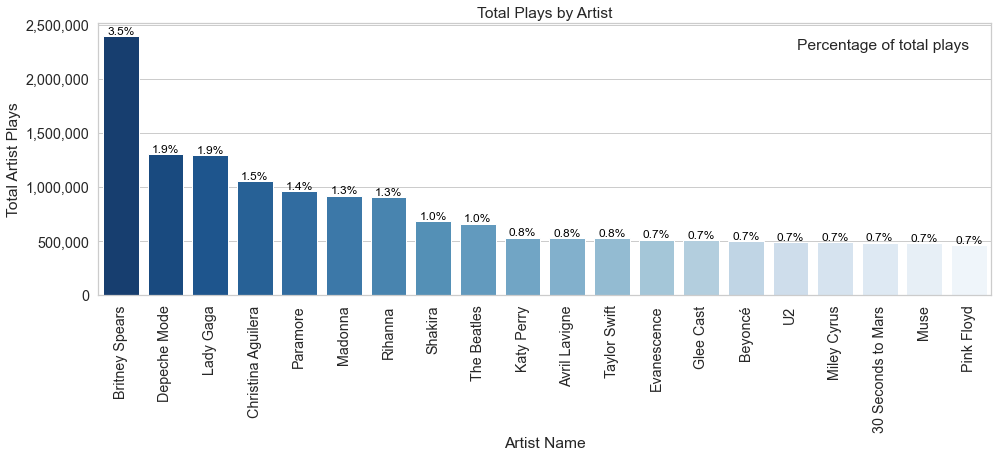

In [26]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

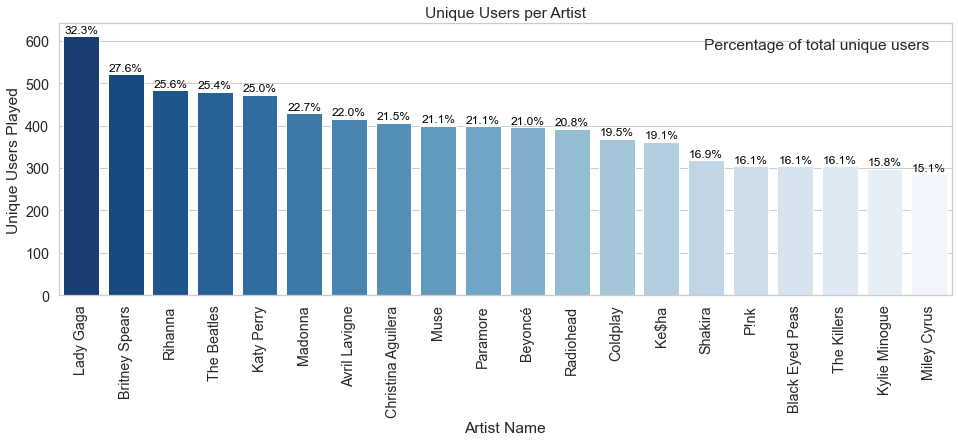

In [27]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = df.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

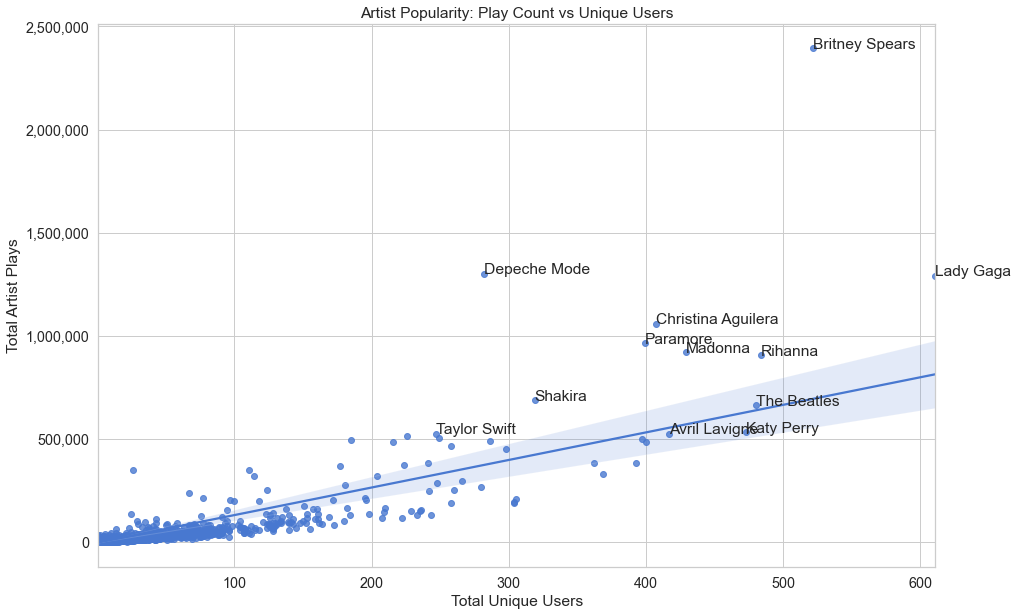

In [28]:
top_artists = artist_rank.sort_values(['totalArtistPlays'],ascending=False).index[:12]

x = artist_rank.totalUniqueUsers
y = artist_rank.totalArtistPlays
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

In [29]:
user_artist_plays.head(1)

,userID,artistID,weight
0,2,51,13883


In [30]:
user_artist_plays.groupby('userID')['weight'].count().reset_index().sort_values('weight', ascending=True)[:-10]


,userID,weight
1878,2085,1
1187,1307,1
1562,1731,1
1584,1758,1
571,615,1
...,...,...
642,690,50
640,688,50
639,687,50
638,686,50


## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [31]:
df1 = user_artist_plays
df1.sample(4)

,userID,artistID,weight
48514,1078,3474,101
83703,1892,540,180
26603,578,488,401
59477,1336,163,491


In [32]:
min_artist_ratings = 50
filter_artist = df1['weight'].value_counts() > min_artist_ratings
filter_artist = filter_artist[filter_artist].index.tolist()

min_user_ratings = 15
filter_users = df1['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df1[(df1['weight'].isin(filter_artist)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df1.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(92834, 3)
The new data frame shape:	(64922, 3)


In [33]:
#df1['ratio'] = df1.groupby('userID')[['weight']].apply(lambda x: (x-x.min())/(x.max()-x.min())).fillna(0.01)


In [34]:
#df1['ratio'] = round(df1['ratio'], 2)
#df1 = df1.drop(columns=['weight'])
#df1.head()

#### Matriz de Usuario-Contenido

In [35]:

# convert the dataframe into a pivot table
#"df1 = df.pivot(index='userID', columns='artistID', values='weight').fillna(0)

# obtain a sparse matrix
#"matrix = csr_matrix(df1.values)

In [36]:
#ArtistasRatings = df1.pivot_table(index=['userID'],columns=['artistID'],values='ratio').fillna(0)

ArtistasRatings = df_new.pivot_table(index=['userID'],columns=['artistID'],values='weight').fillna(0)
ArtistasRatings.head(20)

artistID,1,2,3,4,5,6,7,8,9,10,...,18729,18730,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Entrenamiento del algoritmo de recomendación

In [37]:
#reader = Reader(rating_scale=(df1.ratio.min(), df1.ratio.max()))
reader = Reader(rating_scale=(df_new.weight.min(), df_new.weight.max()))

#data = Dataset.load_from_df(df1[["userID", "artistID", "ratio"]], reader)
data = Dataset.load_from_df(df_new[["userID", "artistID", "weight"]], reader)



In [38]:
ratings_train, ratings_test = train_test_split(data, test_size=0.2)
model = KNNWithMeans(k=5).fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 113.8102


In [39]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, data , measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm KNNWithMeans on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    115.8663115.2864115.6144115.58900.2374  
Fit time          0.47    0.51    0.41    0.46    0.04    
Test time         2.17    2.07    2.20    2.15    0.06    


In [40]:
model2 =BaselineOnly()
cross_validated_metrics2 = cross_validate(model2, data, measures=['RMSE'], cv=3, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    100.486698.9491 99.4410 99.6256 0.6411  
Fit time          0.21    0.25    0.25    0.24    0.02    
Test time         0.30    0.24    0.37    0.30    0.05    


In [41]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=True)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    450.3676450.2389449.8013450.13590.2424  
Fit time          5.14    4.53    4.67    4.78    0.26    
Test time         0.34    0.37    0.27    0.33    0.04    
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    449.2720450.9661450.2639450.16730.6950  
Fit time          46.12   52.59   48.84   49.18   2.65    
Test time         1.96    1.70    2.02    1.89    0.14    
Evaluating RMSE of algorithm SlopeOne on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    109.3016108.9830110.3584109.54770.5878  
Fit time          9.34    14.32   8.92    10.86   2.45    
Test time         1.44    1.52    1.30    1.42    0.09    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    216.5442216.

In [42]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [43]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,99.705186,0.266702,0.263955
SlopeOne,109.547677,10.859446,1.420623
CoClustering,112.085567,5.853353,0.473540
KNNBaseline,112.322272,0.717616,4.264624
KNNWithMeans,113.966636,0.509108,3.534237
KNNWithZScore,114.017342,0.614514,3.303750
KNNBasic,143.407258,0.455621,3.231662
NormalPredictor,187.766974,0.172915,0.514917
NMF,216.098550,9.616166,0.412044


In [44]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([98.31083671, 97.87300604, 97.75249817]),
 'fit_time': (0.16314697265625, 0.1760084629058838, 0.16028618812561035),
 'test_time': (0.1902318000793457, 0.4914991855621338, 0.3393702507019043)}

In [45]:

trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 95.8848


95.88482818760268

In [46]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)


In [47]:
df.head(1)

,uid,iid,rui,est,details,Iu,Ui,err
0,343,5902,62.0,188.243189,{'was_impossible': False},30,1,126.243189


In [48]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [49]:
best_predictions


,uid,iid,rui,est,details,Iu,Ui,err
5579,494,4704,208.0,207.994040,{'was_impossible': False},20,19,0.005960
11220,1366,907,142.0,141.989303,{'was_impossible': False},37,62,0.010697
3178,816,545,17.0,17.012148,{'was_impossible': False},37,23,0.012148
11011,314,486,225.0,224.979479,{'was_impossible': False},33,107,0.020521
1609,657,9003,247.0,246.970888,{'was_impossible': False},26,0,0.029112
6444,37,1224,253.0,253.058338,{'was_impossible': False},38,0,0.058338
3856,977,11504,80.0,79.937690,{'was_impossible': False},33,0,0.062310
15227,114,1803,94.0,94.073203,{'was_impossible': False},33,29,0.073203
11313,1254,512,310.0,309.889836,{'was_impossible': False},26,23,0.110164
13304,1074,1767,201.0,200.887402,{'was_impossible': False},34,9,0.112598


In [50]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
10988,1882,17335,570.0,178.832182,{'was_impossible': False},27,0,391.167818
407,48,1466,486.0,91.962139,{'was_impossible': False},33,0,394.037861
40,125,3058,532.0,135.148974,{'was_impossible': False},30,3,396.851026
7126,841,538,473.0,72.975812,{'was_impossible': False},33,75,400.024188
10664,656,601,473.0,72.433306,{'was_impossible': False},32,15,400.566694
10997,728,869,580.0,176.114117,{'was_impossible': False},0,3,403.885883
10072,1046,288,615.0,193.727141,{'was_impossible': False},33,169,421.272859
14615,1278,545,559.0,127.565234,{'was_impossible': False},26,23,431.434766
14274,946,1198,615.0,173.628729,{'was_impossible': False},18,21,441.371271
10846,1621,12315,557.0,94.192449,{'was_impossible': False},37,2,462.807551


#### Sistema de recomendación:

In [51]:
df2 = user_artist_plays
df2.head(2)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690


In [54]:
from scipy.sparse import csr_matrix

def create_X(df2):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df2['userID'].nunique()
    N = df2['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df2["userID"]), list(range(M))))
    artist_mapper = dict(zip(np.unique(df2["artistID"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df2["userID"])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df2["artistID"])))
    
    user_index = [user_mapper[i] for i in df2['userID']]
    item_index = [artist_mapper[i] for i in df2['artistID']]

    X = csr_matrix((df2["weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(df2)

In [55]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.28%


In [56]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()} artist.")
print(f"Least active user rated {n_ratings_per_user.min()} artist.")

Most active user rated 50 artist.
Least active user rated 1 artist.


In [57]:
n_ratings_per_artist = X.getnnz(axis=0)

print(f"Most rated artist has {n_ratings_per_artist.max()} ratings.")
print(f"Least rated artist has {n_ratings_per_artist.min()} ratings.")

Most rated artist has 611 ratings.
Least rated artist has 1 ratings.


C:\Users\CristianSalgado\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


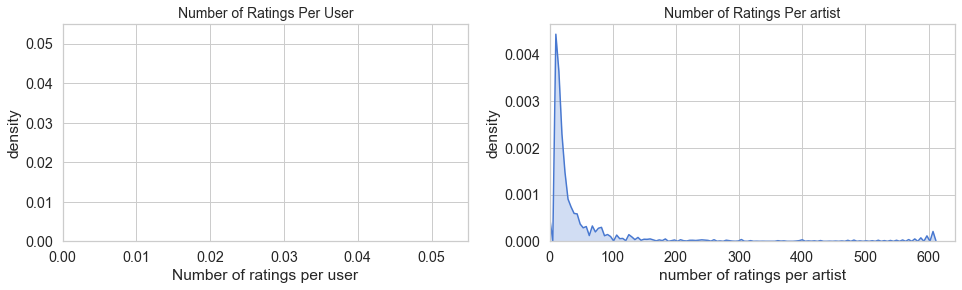

In [58]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("Number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_artist, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per artist", fontsize=14)
plt.xlabel("number of ratings per artist")
plt.ylabel("density")
plt.show()

In [59]:
sum_ratings_per_artist = X.sum(axis=0)
mean_rating_per_artist = sum_ratings_per_artist/n_ratings_per_artist

In [60]:
X_mean_artist = np.tile(mean_rating_per_artist, (X.shape[0],1))

In [61]:
X_mean_artist.shape

(1892, 17632)

In [62]:
X_norm = X - csr_matrix(X_mean_artist)

In [63]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artist(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    
   # model2 =BaselineOnly()
   # cross_validated_metrics2 = cross_validate(model2, data, measures=['RMSE'], cv=3, verbose=True)
    
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [64]:
similar_artist = find_similar_artist(1, X_norm,artist_mapper, artist_inv_mapper, k=10)
similar_artist

[5077, 5085, 5086, 5090, 5091, 5092, 5095, 5096, 5078]

In [65]:
#artist_data[artist_data['name']== 'Britney Spears']
#artist_data[artist_data['name']== 'Depeche Mode']
#artist_data[artist_data['name']== 'Shakira']
artist_data[artist_data['name']== 'Madonna']
#artist_data[artist_data['name']== 'Enrique Iglesias']
#artist_data[artist_data['name']== 'Eminem']

,id,name,url,pictureURL
61,67,Madonna,http://www.last.fm/music/Madonna,http://userserve-ak.last.fm/serve/252/340387.jpg


In [66]:
artist_titles = dict(zip(artist_data['id'], artist_data['name']))

artist_id = 701
#artist_data= 'Shakira'

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='cosine', k=10)
artist_title = artist_titles[artist_id]

print(f"Por que escuchaste {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Por que escuchaste Shakira:
Enrique Iglesias
Black Eyed Peas
Beyoncé
Ke$ha
Michael Jackson
Bruno Mars
Eminem
Katy Perry
Gwen Stefani


In [67]:
artist_id = 67

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='euclidean', k=10)
artist_title = artist_titles[artist_id]

print(f"Por que escuchaste {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Por que escuchaste Madonna:
Janet Jackson
Kylie Minogue
Missy Elliott
The Go-Go's
Blake Lewis
MBrother
Esthero
TLC
Klaus Badelt


### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

####  Evaluacion sobre cold start

In [68]:
artist_data.head(1)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg


In [69]:
#Dejo afuero a los siguientes Artistas
#artist_data[artist_data['name']== 'Britney Spears']   #289
#artist_data[artist_data['name']== 'Depeche Mode']     #72
#artist_data[artist_data['name']== 'Shakira']           #701
#artist_data[artist_data['name']== 'Madonna']    # 67
#artist_data[artist_data['name']== 'Enrique Iglesias']         #161
#artist_data[artist_data['name']== 'Eminem']                      #475

Afuera = [475,161,67,701,72,289] 
artistas_Sin = artist_data[~artist_data['id'].isin(Afuera)]

In [70]:
artistas_Sin[artistas_Sin['id']==161]

,id,name,url,pictureURL


In [71]:
user_taggedartists.head(1)

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009


In [72]:
user_taggedartists_Sin = user_taggedartists[~user_taggedartists.artistID.isin(Afuera)]

In [73]:
user_taggedartists_Sin[user_taggedartists_Sin['artistID']==161]

,userID,artistID,tagID,day,month,year


In [74]:
user_artist_plays.head(1)

,userID,artistID,weight
0,2,51,13883


In [75]:
User_sin = user_artist_plays[~user_artist_plays.artistID.isin(Afuera)]

In [76]:
User_sin[User_sin['artistID']==161]

,userID,artistID,weight


In [77]:
tags.sample(5)

,tagID,tagValue
2999,3049,favorite tracks
7792,8141,the velvet underground
11121,11752,makes you dance
9475,9996,im breaking dishes up in here all night
666,673,supersonic


In [78]:
#Hago merge por TagID
user_artist_tag = pd.merge(tags, user_taggedartists_Sin, on=["tagID"])

In [79]:
user_artist_tag.head(1)

,tagID,tagValue,userID,artistID,day,month,year
0,1,metal,4,918,1,5,2008


In [80]:
artist_data.head(1)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg


In [81]:
artist_data = artist_data.rename(columns={"id" : 'artistID'})

In [82]:
#Hago merge por artist
user_artist_tag = pd.merge(user_artist_tag, artist_data, how='inner', on=["artistID"])


In [83]:
User_sin.head(1)

,userID,artistID,weight
0,2,51,13883


In [84]:
#uno artistID y userid para quedarme con una ultima df
user_artist_tag = pd.merge(User_sin, user_artist_tag, on=["artistID","userID"]) 

In [85]:
user_artist_tag.sample(2)

,userID,artistID,weight,tagID,tagValue,day,month,year,name,url,pictureURL
51801,1560,3317,1845,9862,young money,1,11,2010,Drake,http://www.last.fm/music/Drake,http://userserve-ak.last.fm/serve/252/31573727...
2447,59,1534,574,793,fucking awesome,1,11,2008,The Sisters of Mercy,http://www.last.fm/music/The+Sisters+of+Mercy,http://userserve-ak.last.fm/serve/252/13119153...


####  EVectores de contenido

In [86]:
## 2.b.2
user_arti = user_artist_tag.groupby(['userID','name'])['weight'].sum().reset_index()
user_arti.head(5)

,userID,name,weight
0,2,Café Del Mar,20672
1,2,Enigma,14940
2,2,Fleetwood Mac,2684
3,2,Ministry of Sound,10984
4,2,Morcheeba,58450


In [87]:
artists = user_artist_tag.groupby(['artistID','name'])['weight'].sum().reset_index()
artists.head(5)

,artistID,name,weight
0,1,MALICE MIZER,559
1,2,Diary of Dreams,12738
2,3,Carpathian Forest,185
3,4,Moi dix Mois,1124
4,5,Bella Morte,780


In [88]:
artist_tag = user_artist_tag.groupby(['artistID','tagValue'])['weight'].sum().reset_index()
artist_tag.head(5)

,artistID,tagValue,weight
0,1,better than lady gaga,76
1,1,jrock,483
2,2,darkwave,4895
3,2,german,3627
4,2,gothic,4055


In [89]:
import numpy as np
artists["Lista"] = np.nan
artists.sample(10)

,artistID,name,weight,Lista
3908,7559,Manu Dibango,60,NaN
301,409,G-Dragon,20130,NaN
1403,1948,Quasimoto,714,NaN
3706,6957,Steve Vai,1968,NaN
5086,11402,drake and lil wayne,40,NaN
5775,14269,Versant,165,NaN
3692,6905,Freeway,6066,NaN
6689,18081,Wintersleep,19,NaN
946,1261,Sodom,5906,NaN
6358,17014,Slipper,32,NaN


In [90]:
for i in artists.index:
    tags = artist_tag[artist_tag["artistID"] == artists["artistID"][i]]["tagValue"]
    TList = tags.values.tolist()
    artists["Lista"][i] = TList
   

<ipython-input-90-0c9e19150b92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists["Lista"][i] = TList
C:\Users\CristianSalgado\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [91]:
artists.sample(2)

,artistID,name,weight,Lista
2088,3239,Otep,4421,"[alternative metal, awesome covers, experiment..."
6298,16678,Pernice Brothers,3532,"[favourites, indie indi]"


In [92]:
artists.columns

Index(['artistID', 'name', 'weight', 'Lista'], dtype='object')

In [93]:
artists.drop(columns=['weight'])

,artistID,name,Lista
0,1,MALICE MIZER,"[better than lady gaga, jrock]"
1,2,Diary of Dreams,"[darkwave, german, gothic, gothic rock]"
2,3,Carpathian Forest,"[black metal, norsk arysk metal, norwegian bla..."
3,4,Moi dix Mois,"[j-rock, visual kei]"
4,5,Bella Morte,"[darkwave, gothic, gothic rock]"
...,...,...,...
6843,18734,The Young Gods,"[alternative, electronica]"
6844,18735,Wiseblood,[alternative]
6845,18736,LOSTFREEQ,"[-pearl fashion music, ambient, aphex twin, at..."
6846,18737,Ciccone Youth,"[alternative, electronica, trip beat]"


In [94]:
artists.head(1)

,artistID,name,weight,Lista
0,1,MALICE MIZER,559,"[better than lady gaga, jrock]"


####  Sistema de Recomendacion

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class GenresBasedFilter(object):
    def __init__(self, artists, k=5):
        self.artist_to_idx = {row["name"]: idx for idx, row in artists.iterrows()}
        self.idx_to_artist = {idx: artist for artist, idx in self.artist_to_idx.items()}
        self.k = k

        tagres = set(g for G in artists['Lista'] for g in G)
        for g in tagres:
            artists[g] = artists.Lista.transform(lambda x: int(g in x))

        self.artist_tagres = artists.drop(columns=['artistID', 'name', 'Lista'])

    def fit(self, usr_ratings):
        self.artist_cosine_sim_ = cosine_similarity(self.artist_tagres, self.artist_tagres)

        self.user_ratings_ = {}
        for (userID, name, weight_rank) in usr_ratings.build_testset():
            if userID not in self.user_ratings_:
                self.user_ratings_[userID] = {}
            self.user_ratings_[userID][name] = weight_rank

        return self

    def predict(self, userID, artist):
        if not userID in self.user_ratings_ or not artist in self.artist_to_idx:
            global_mean = np.mean([
                usr_ratings for artist in self.user_ratings_.values() for usr_ratings in artist.values()
            ])
            return global_mean

        artist_idx = self.artist_to_idx[artist]
        sim_scores = list(enumerate(self.artist_cosine_sim_[artist_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:]

        sims = []

        for artist, score in sim_scores:
            if self.idx_to_artist[artist] in self.user_ratings_[userID]:
                sims.append((self.user_ratings_[userID][self.idx_to_artist[artist]], score))
                if len(sims) >= self.k:
                    break

        user_mean = np.mean(list(self.user_ratings_[userID].values()))

        pred = 0
        sim_sum = 0

        for rating, score in sims:
            pred += score * (rating - user_mean)
            sim_sum += score

        if sim_sum == 0:
            return user_mean

        return user_mean + pred / sim_sum

In [96]:
Model_2 = GenresBasedFilter(artists).fit(ratings_train)

In [97]:
from tqdm import tqdm_notebook  # libreria para ver como va corriendo el modelo

transformed_ratings_train = []

for u, m, r in tqdm_notebook(ratings_train.build_testset()):
    transformed_ratings_train.append({
        "userID": u,
        "name": m,
        "cb_rating": Model_2.predict(u, m),
        "cf_rating": algo.predict(u, m).est,
        "weight": r
    })

transformed_ratings_train = pd.DataFrame(transformed_ratings_train)

<ipython-input-97-c293eea60b0a>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for u, m, r in tqdm_notebook(ratings_train.build_testset()):


In [98]:
transformed_ratings_train.head(5)

,userID,name,cb_rating,cf_rating,weight
0,1757,430,186.504688,125.550498,62.0
1,1757,1026,186.504688,116.197788,130.0
2,1757,306,186.504688,127.889199,97.0
3,1757,498,186.504688,159.092433,48.0
4,1757,292,186.504688,180.875885,191.0


In [99]:
#Funciones de Atributos

from collections import defaultdict

user_mean_rating = defaultdict(
    lambda: transformed_ratings_train["weight"].sum(),
    transformed_ratings_train.groupby("userID")["weight"].sum().to_dict()
)
user_num_rating = defaultdict(
    lambda: 0,
    transformed_ratings_train.groupby("userID").size().to_dict()
)

def feature_function_constant():
    return 1

def feature_function_mean(user_id): # Media de rating que devuelve el usuario
    return user_mean_rating[user_id]

def feature_function_over(user_id, min_ratings=2): # Si el usuario puntuo más de 2 ratings
    return int(user_num_rating[user_id] >= min_ratings)

In [100]:
for base_model in ["cb", "cf"]:
    transformed_ratings_train["{}_rating_fc".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_train["{}_rating_fm".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_train["{}_rating_fo".format(base_model)] =\
        transformed_ratings_train.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )
 

In [101]:
from sklearn.linear_model import LinearRegression

fwls_model = LinearRegression()

feature_cols = ["{}_rating_{}".format(fm, ff) for fm in ["cb", "cf"] for ff in ["fc", "fo", "fm"]]

fwls_model.fit(
    transformed_ratings_train[feature_cols],
    transformed_ratings_train["weight"]
)

LinearRegression()

In [102]:
from sklearn.metrics import mean_squared_error

for model in ["cf", "cb"]:
    rmse = np.sqrt(
        mean_squared_error(
            transformed_ratings_train["weight"],
            transformed_ratings_train["{}_rating".format(model)]
        )
    )
    
    print("RMSE for {} model: {:03f}".format(model, rmse))

RMSE for cf model: 90.199490
RMSE for cb model: 138.317649


#### Evaluacion del Sistema

In [103]:
#Pruebo el modelo en test
transformed_ratings_test = []

for u, m, r in tqdm_notebook(ratings_test):
    transformed_ratings_test.append({
        "userID": u,
        "name": m,
        "cb_rating": Model_2.predict(u, m),
        "cf_rating": algo.predict(u, m).est,
        "weight": r
    })

transformed_ratings_test = pd.DataFrame(transformed_ratings_test)

<ipython-input-103-6c4193b532dd>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for u, m, r in tqdm_notebook(ratings_test):


In [104]:
for base_model in ["cb", "cf"]:
    transformed_ratings_test["{}_rating_fc".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_constant(),
            axis=1
        )
    transformed_ratings_test["{}_rating_fm".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_mean(row["userID"]),
            axis=1
        )
    transformed_ratings_test["{}_rating_fo".format(base_model)] =\
        transformed_ratings_test.apply(
            lambda row: row["{}_rating".format(base_model)] * feature_function_over(row["userID"]),
            axis=1
        )




In [105]:
from sklearn.metrics import mean_squared_error

for model in ["cf", "cb"]:
    rmse = np.sqrt(
        mean_squared_error(
            transformed_ratings_test["weight"],
            transformed_ratings_test["{}_rating".format(model)]
        )
    )
    
    print("RMSE for {} model: {:03f}".format(model, rmse))

RMSE for cf model: 90.344080
RMSE for cb model: 139.074211


Me quedo con el modelo cf

In [106]:
transformed_ratings_test.head(1)

,userID,name,cb_rating,cf_rating,weight,cb_rating_fc,cb_rating_fm,cb_rating_fo,cf_rating_fc,cf_rating_fm,cf_rating_fo
0,1292,681,186.504688,90.305392,96.0,186.504688,160580.536689,186.504688,90.305392,77752.942637,90.305392


In [107]:
# avg ratings and rating counts
avg_rating = transformed_ratings_test.groupby("name")["cf_rating"].mean()
num_ratings = transformed_ratings_test.groupby("name")["cf_rating"].count()
# getting counts and average ratings
cf_ratings_counts = pd.DataFrame({"avg_rating": avg_rating,
                               "num_of_ratings": num_ratings})
# joining the new values to movie data
full_artist_data_cf = pd.merge(transformed_ratings_test, cf_ratings_counts, left_on="name", right_index=True)

In [108]:
full_artist_data_cf = full_artist_data_cf.rename(columns = {'name': 'artistID'}, inplace = False)

In [109]:
transformed_ratings_test = transformed_ratings_test.rename(columns = {'name': 'artistID'}, inplace = False)

In [110]:
artist_pivot_cf = transformed_ratings_test.pivot_table(index='userID', 
                            columns='artistID', values='cf_rating').fillna(0)

In [111]:
full_artist_data_cf.head(1)

,userID,artistID,cb_rating,cf_rating,weight,cb_rating_fc,cb_rating_fm,cb_rating_fo,cf_rating_fc,cf_rating_fm,cf_rating_fo,avg_rating,num_of_ratings
0,1292,681,186.504688,90.305392,96.0,186.504688,160580.536689,186.504688,90.305392,77752.942637,90.305392,181.693288,18


In [112]:
artist_pivot_cf.shape

(1713, 5402)

In [114]:
artist_id = 475 #eminem
# crear funcion para pasar el dataset nuevo*
similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='euclidean', k=10)
artist_title = artist_titles[artist_id]

print(f"Por que escuchaste {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Por que escuchaste Eminem:
Akon
Lil' Wayne
Kanye West
DMX
Flo Rida
Alexandra Stan
Nelly
Ice Cube
\Eminem f_ Rihanna
